# import library 

In [ ]:
import pandas as pd                     #ຈັັດການກັບຂໍ້ມູນ
from fbprophet import Prophet           #ວິເຄາະຂໍ້ມູນ ແລະ ສ້າງ model ດ້ວຍ Time series
import io                               #ອັບໂຫຼດໄຟຣ໌ເຂົ້າມາໃສ່ notebook
import matplotlib.pyplot as plt         #ສ້າງກຣາຟ

# ໂຫຼດໄຟຣ໌ **BTC_USD.csv** ເຂົ້າມາຈາກ File Explorer

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving BTC_USD.csv to BTC_USD (1).csv


# ອ່ານໄຟຣ໌ **BTC_USD.csv** ເຂົ້າໃສ່ **df**

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['BTC_USD.csv'])) 
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2656,BTC,2021-01-18,36375.811379,36016.753089,36840.132854,33870.138376
2657,BTC,2021-01-19,36346.609502,35847.833425,37440.404012,34816.289250
2658,BTC,2021-01-20,36577.519646,36639.985912,37876.158929,36136.535574
2659,BTC,2021-01-21,35004.532627,35909.432247,36409.708596,33430.821992


# ປ່ຽນຊື່ Column: 
**Date -> "ds"** |
**Closing Price (USD) -> "y"**
ເພືື່ອທີ່ຈະເອົາໄປວິເຄາະດ້ວຍ **Prophet**

In [ ]:
# Format data for prophet model using ds and y
df=df.rename(columns={"Date": "ds", "Closing Price (USD)": "y"})
df

,Currency,ds,y,24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2656,BTC,2021-01-18,36375.811379,36016.753089,36840.132854,33870.138376
2657,BTC,2021-01-19,36346.609502,35847.833425,37440.404012,34816.289250
2658,BTC,2021-01-20,36577.519646,36639.985912,37876.158929,36136.535574
2659,BTC,2021-01-21,35004.532627,35909.432247,36409.708596,33430.821992


# ສ້າງ Data frame ທີ່ຊື່ວ່າ BTC ເຊິ່ງເລືອກເອົາ **'ds','y'** ຈາກ df

In [ ]:
BTC = df[['ds','y']]
BTC

,ds,y
0,2013-10-01,123.654990
1,2013-10-02,125.455000
2,2013-10-03,108.584830
3,2013-10-04,118.674660
4,2013-10-05,121.338660
...,...,...
2656,2021-01-18,36375.811379
2657,2021-01-19,36346.609502
2658,2021-01-20,36577.519646
2659,2021-01-21,35004.532627


# ກວດສອບ datatype
ds ຕ້ອງເປັນ datetime |
y ຕ້ອງເປັນ numeric ຫຼື float64

In [ ]:
BTC.dtypes

ds     object
y     float64
dtype: object

# ປ່ຽນ data type:
ds -> datetime

In [ ]:
# converting the string to datetime format 
BTC.ds = pd.to_datetime(BTC.ds) 

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# ກວດສອບ datatype ອີກຄັ້ງ

In [ ]:
BTC.dtypes

ds    datetime64[ns]
y            float64
dtype: object

# ສະແດງກຣາຟ **ລາຄາBitcoin** ຈາກຂໍ້ມູນທີ່ເຮົາໂຫຼດມາ

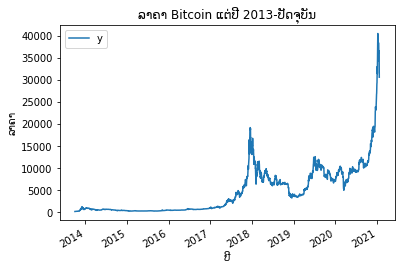

In [ ]:

BTC.plot(x='ds',y='y')
plt.title("ລາຄາ Bitcoin ແຕ່ປີ 2013-ປັດຈຸບັນ")
plt.ylabel('ລາຄາ')
plt.xlabel('ປີ');
plt.show()


# fit model ດ້ວຍ Prophet 
ເຊິ່ງຈະໃຊ້ເວລາຢູ່ປະມານ 1-5 ວິນາທີ




In [ ]:
model1 = Prophet()
model1.fit(BTC)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# ຈາກນັ້ນການວິເຄາະຈະຖືກສ້າງຂຶ້ນໃນ data frame future1 ໂດຍມີຖັນ ds ທີ່ມີວັນທີທີ່ຈະວິເຄາະ 
ເຮົາຈະໄດ້ dataframe ທີ່ເໝາະສົມເຊິ່ງຂະຫຍາຍໄປໃນອະນາຄົດ ຕາມຈຳນວນວັນທີ່ກຳນົດ ໂດຍເຮົາຈະໃຊ້ຄຳສັ່ງ Prophet.make_future_dataframe ຕາມຄ່າເລີ່ມຕົ້ນຈາກຂໍ້ມູນໃນອະດີດທີ່ມີໄວ້ນຳ ດັ່ງນັ້ນເຮົາຈະເຫັນຄວາມແຕກຕ່າງລະຫວ່າງຄ່າລາຄາຈິງ ແລະ ຄ່າທີ່ເຮົາວິເຄາະໄດ້

In [ ]:
future1 = model1.make_future_dataframe(periods=365)
future1.tail()

,ds
3021,2022-01-18
3022,2022-01-19
3023,2022-01-20
3024,2022-01-21
3025,2022-01-22


# ວິທີການວິເຄາະ
ຈະກຳນົດຄ່າວິເຄາະແຕ່ລະແຖວໃນອະນາຄົດໃນ forecast1 ທີ່ມີຖັນ yhat = ລາຄາສະເລ່ຍ yhat_lower = ລາຄາຄາດເຄື່ອນຕ່ຳສຸດ yhat_upper = ລາຄາຄາດເຄື່ອນສູງສຸດ

In [ ]:
forecast1 = model1.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3021,2022-01-18,25482.230145,20882.058324,29978.780991
3022,2022-01-19,25335.631914,21246.165437,29682.665366
3023,2022-01-20,25208.784619,20896.092017,29270.528665
3024,2022-01-21,25038.468120,20489.570092,29509.811903
3025,2022-01-22,24852.265896,20445.566231,29307.050458


# ສ້າງກຣາຟທີ່ໄດ້ຈາກການວິເຄາະ

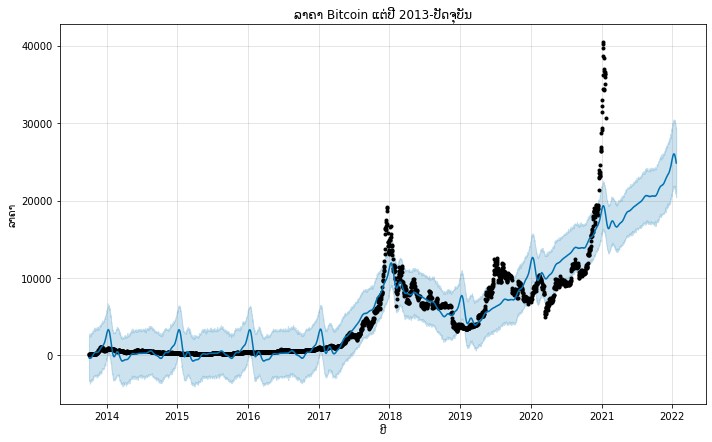

In [ ]:
fig1 = model1.plot(forecast1)
plt.title("ລາຄາ Bitcoin ແຕ່ປີ 2013-ປັດຈຸບັນ")
plt.ylabel('ລາຄາ')
plt.xlabel('ປີ');
plt.show()

# ສ້າງກຣາຟທີ່ໄດ້ຈາກການວິເຄາະເຊິ່ງຈະສະແດງເປັນຊ່ວງເວລາຕ່າງໆ

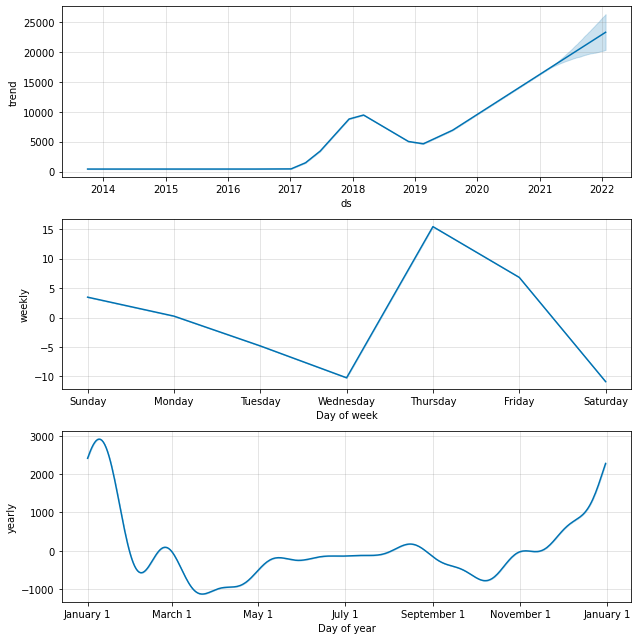

In [ ]:
fig2 = model1.plot_components(forecast1)
